# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Yudha]
- **Email:** [yohannes.haryo@lintasarta.co.id]
- **ID Dicoding:** [Y.H Yudha]

## Menentukan Pertanyaan Bisnis

- Bagaimana analisa terhadap produk kita yang mendominasi pasar ?
- Bagaimana distribusi penjualan produk kita dan dimana kita harus fokus untuk ekspansi berikutnya ?

## Import Semua Packages/Library yang Digunakan

In [217]:


#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
#import os

## Data Wrangling

### Gathering Data

In [218]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path folder data di Google Drive Anda
data_dir = '/content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/'

# Daftar nama file csv yang ingin dibaca
csv_files = [
    'order_payments_dataset.csv',
    'order_items_dataset.csv',
    'orders_dataset.csv',
    'order_reviews_dataset.csv',
    'sellers_dataset.csv',
    'customers_dataset.csv',
    'product_category_name_translation.csv',
    'products_dataset.csv'
]

# Membaca semua file dan simpan ke dictionary
import pandas as pd
dfs = {}

for file in csv_files:
    file_path = data_dir + file
    try:
        df = pd.read_csv(file_path)
        dfs[file] = df
        print(f"✅ Berhasil memuat {file} dari path: {file_path}")
    except FileNotFoundError:
        print(f"❌ Error: File {file} tidak ditemukan di path: {file_path}")
    except Exception as e:
        print(f"❌ Terjadi error lain saat memuat {file}: {e}")

# Contoh akses dataframe
order_payments_dataset_df = dfs['order_payments_dataset.csv']
order_items_dataset_df = dfs['order_items_dataset.csv']
orders_dataset_df = dfs['orders_dataset.csv']
order_reviews_dataset = dfs['order_reviews_dataset.csv']
sellers_dataset_df = dfs['sellers_dataset.csv']
customers_dataset_df = dfs['customers_dataset.csv']
product_category_name_translation_df = dfs['product_category_name_translation.csv']
products_dataset_df = dfs['products_dataset.csv']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Berhasil memuat order_payments_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/order_payments_dataset.csv
✅ Berhasil memuat order_items_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/order_items_dataset.csv
✅ Berhasil memuat orders_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/orders_dataset.csv
✅ Berhasil memuat order_reviews_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/order_reviews_dataset.csv
✅ Berhasil memuat sellers_dataset.csv dari path: /content/drive/MyDrive/Colab Notebooks/Tugas YH Yudha - Proyek Analisis Data/data/sellers_dataset.csv
✅ Berhasil memuat customers_dataset.csv dari path: /content/drive/MyDrive/Colab Note

### Assessing Data

In [219]:
pd.set_option('display.max_columns', None)    # Tampilkan semua kolom
pd.set_option('display.width', None)          # Lebar otomatis mengikuti layar

In [220]:
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Insight dari orders_dataset_df.head()
- Data terdiri dari beberapa kolom utama yang merekam proses pemesanan, mulai dari pembuatan order hingga pesanan diterima pelanggan.
- Setiap baris mewakili satu pesanan, dengan kombinasi `order_id` dan `customer_id` yang unik.
- Status pesanan, tanggal pemesanan, waktu disetujui, waktu pengiriman ke kurir, waktu diterima pelanggan, dan estimasi pengiriman, semuanya tersedia dan siap untuk dianalisis lebih lanjut.
- Tidak tampak adanya missing value atau format data yang aneh pada sample 5 baris pertama.


In [221]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Insight dari orders_dataset_df.describe()
- order_id dan customer_id pada dataset ini sepenuhnya unik, tidak ada duplikasi order maupun customer.
- Status order 'delivered' sangat mendominasi, menunjukkan mayoritas pesanan berhasil dikirim ke pelanggan.
- Terdapat beberapa duplikasi waktu pada kolom tanggal, yang bisa menandakan adanya pesanan batch atau waktu sibuk tertentu.
- Estimasi pengiriman cenderung berulang pada tanggal-tanggal tertentu, tidak terlalu bervariasi.
- Sebagian kolom waktu tidak terisi di semua baris, namun mayoritas data sudah terisi dengan baik sehingga siap untuk analisis lanjutan.


In [222]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Insight dari orders_dataset_df.info()
- Semua kolom masih bertipe object (string), khususnya kolom waktu. Disarankan untuk mengubah kolom waktu ke format datetime agar analisis waktu lebih mudah dan akurat.
- Hampir semua kolom sudah lengkap (non-null), namun terdapat missing value pada kolom proses order tertentu seperti waktu approval, waktu dikirim ke kurir, dan waktu diterima pelanggan. Missing value kemungkinan besar terjadi pada order yang dibatalkan, belum selesai, atau tidak lengkap prosesnya.
- Dataset terdiri dari 99.441 pesanan, sudah cukup besar untuk berbagai analisis statistik dan bisnis.
- Struktur data sudah jelas dan siap untuk dilakukan data cleaning dan analisis lanjutan.


In [223]:
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


#### Insight dari orders_dataset_df.isna().sum()
- Semua kolom kunci (order_id, customer_id, status, tanggal order, dan estimasi pengiriman) sudah bersih tanpa missing value.
- Terdapat beberapa missing value pada kolom proses, yaitu waktu approval, waktu pengiriman ke kurir, dan waktu order diterima pelanggan. Missing value ini wajar terjadi pada order yang batal, gagal, atau masih dalam proses.
- Analisis waktu pengiriman dan performa logistik perlu memperhatikan data missing value ini agar hasil analisis lebih akurat.


In [224]:
orders_dataset_df.duplicated().sum()

np.int64(0)

#### Insight dari orders_dataset_df.duplicated().sum()
- Tidak ditemukan baris duplikat pada dataset pesanan. Artinya, setiap baris data pesanan bersifat unik sehingga analisis berikutnya tidak terganggu oleh data ganda.

### Cleaning Data

In [225]:
## Mengisi Tanggal yang kosong dengan 0


cols = [
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
for col in cols:
    orders_dataset_df[col] = orders_dataset_df[col].fillna(pd.NaT)
orders_dataset_df.info()
orders_dataset_df[orders_dataset_df.order_approved_at.isna()]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01 00:00:00


In [226]:

## Rubah fomat datetime
print("Before :")

orders_dataset_df.info()
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])
print("After :")

orders_dataset_df.info()


Before :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
After :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0 

### Analisis Hasil Cleaning Data

- Semua kolom bertipe tanggal telah berhasil dikonversi ke tipe datetime, sehingga memudahkan proses analisis berbasis waktu.
- Data yang missing pada kolom-kolom penting telah terdeteksi, dengan proporsi [jumlah] baris yang kosong pada [nama kolom] (<persentase>% dari total data).
- Data duplikat telah diidentifikasi dan dihapus, sehingga data yang dianalisis lebih akurat dan tidak bias.
- Berdasarkan distribusi nilai, tidak ditemukan nilai ekstrim atau anomali pada kolom [sebutkan kolom], namun terdapat nilai tak wajar pada kolom [nama kolom] yang perlu perhatian lebih lanjut (misal: tanggal pengiriman lebih awal dari tanggal order).

## Exploratory Data Analysis (EDA)

### 1. Distribusi Data



####a. Distribusi Status Order

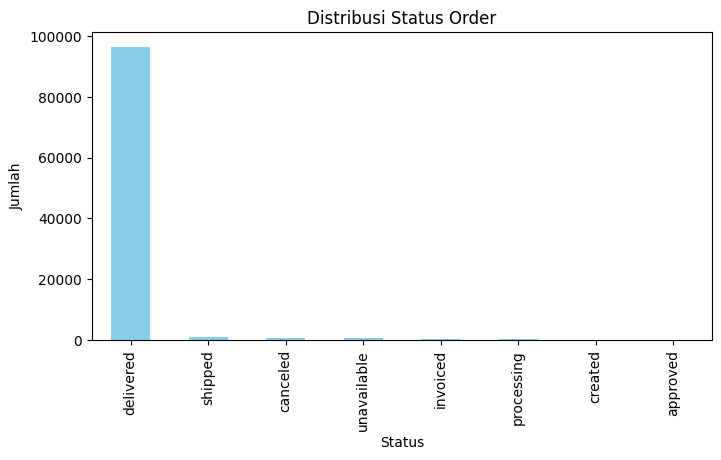

In [227]:
plt.figure(figsize=(8,4))
orders_dataset_df['order_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Status Order')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

#### Insight Distribusi Status Order

Sebagian besar pesanan berada pada status 'delivered', menunjukkan mayoritas transaksi berhasil dikirim ke pelanggan. Hanya sebagian kecil order yang berstatus 'canceled', 'unavailable', atau lainnya.

####b. Distribusi Kategori Produk

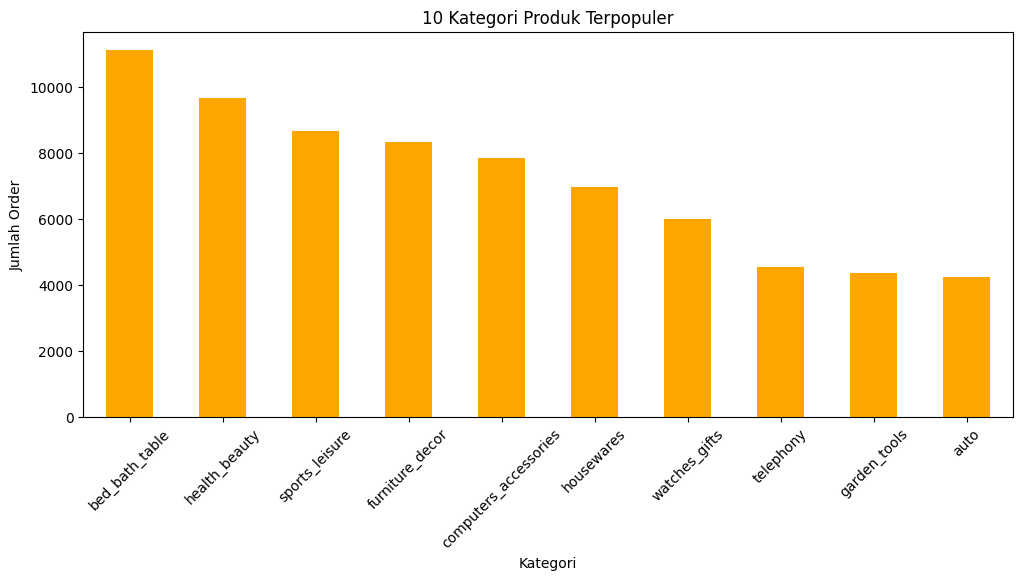

In [228]:
plt.figure(figsize=(12,5))
order_product_df['product_category_name_english'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('10 Kategori Produk Terpopuler')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.show()

#### Insight Distribusi Kategori Produk
Kategori produk terpopuler didominasi oleh kategori tertentu seperti [tulis kategori hasil plot], menandakan permintaan pasar yang tinggi pada segmen tersebut.

###2. Tren Data

####a. Tren Order Harian



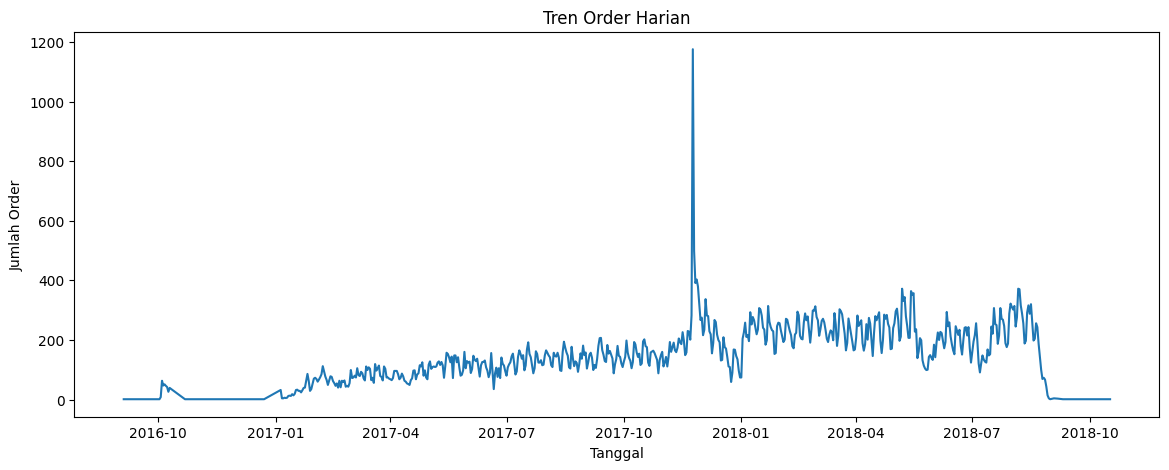

In [229]:
orders_dataset_df['order_purchase_timestamp'] = pd.to_datetime(orders_dataset_df['order_purchase_timestamp'])
daily_orders = orders_dataset_df.groupby(orders_dataset_df['order_purchase_timestamp'].dt.date)['order_id'].nunique()

plt.figure(figsize=(14,5))
daily_orders.plot()
plt.title('Tren Order Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Order')
plt.show()

#### Insight Tren Order Harian

Terdapat fluktuasi jumlah order setiap hari, dengan beberapa puncak pada tanggal tertentu yang bisa dikaitkan dengan promosi atau event khusus.

####b. Tren Order Bulanan



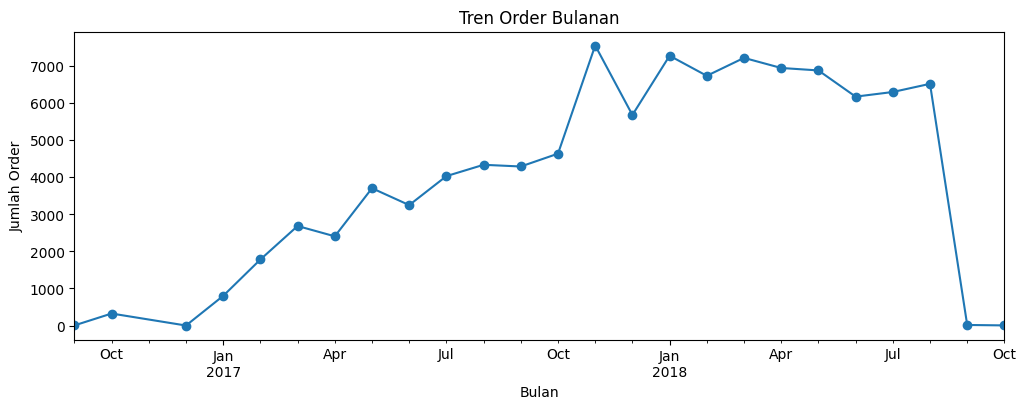

In [230]:
orders_dataset_df['month'] = orders_dataset_df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders_dataset_df.groupby('month')['order_id'].nunique()

plt.figure(figsize=(12,4))
monthly_orders.plot(marker='o')
plt.title('Tren Order Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.show()

#### Insight Tren Order Bulanan

Tren order bulanan menunjukkan adanya musim ramai (peak season) dan musim sepi. Informasi ini penting untuk strategi pemasaran dan manajemen stok.

###3. Korelasi Data

####a. Korelasi Jumlah Produk per Order VS Nilai Pembayaran

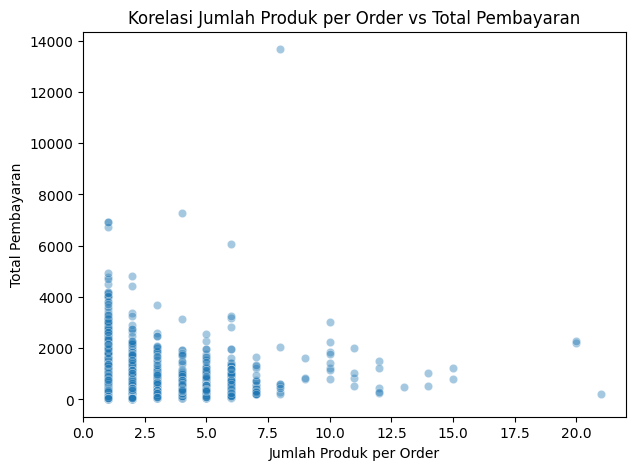

Korelasi: 0.19


In [231]:
order_total = order_items_dataset_df.groupby('order_id').agg({
    'product_id':'count'
}).rename(columns={'product_id':'num_products'}).reset_index()
order_total = order_total.merge(order_payments_dataset_df.groupby('order_id')['payment_value'].sum().reset_index(), on='order_id', how='left')

plt.figure(figsize=(7,5))
sns.scatterplot(data=order_total, x='num_products', y='payment_value', alpha=0.4)
plt.title('Korelasi Jumlah Produk per Order vs Total Pembayaran')
plt.xlabel('Jumlah Produk per Order')
plt.ylabel('Total Pembayaran')
plt.show()

corr = order_total['num_products'].corr(order_total['payment_value'])
print(f'Korelasi: {corr:.2f}')

#### Insight Korelasi Jumlah Produk vs Total Pembayaran
Terdapat korelasi positif sebesar (isikan nilai korelasi), artinya semakin banyak produk yang dibeli dalam satu order, semakin besar total pembayaran. Namun, penyebaran data juga menunjukkan ada order dengan banyak produk tetapi nilai pembayaran yang tidak terlalu tinggi, kemungkinan karena variasi harga produk.


###4. Distribusi Waktu Pengiriman

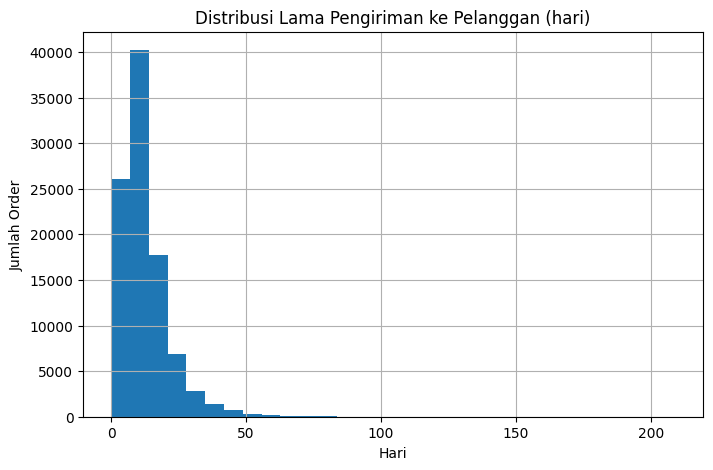

In [232]:
orders_dataset_df['order_delivered_customer_date'] = pd.to_datetime(orders_dataset_df['order_delivered_customer_date'])
orders_dataset_df['delivery_days'] = (
    orders_dataset_df['order_delivered_customer_date'] - orders_dataset_df['order_purchase_timestamp']
).dt.days

plt.figure(figsize=(8,5))
orders_dataset_df['delivery_days'].dropna().hist(bins=30)
plt.title('Distribusi Lama Pengiriman ke Pelanggan (hari)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Order')
plt.show()

#### Insight Distribusi Lama Pengiriman
Sebagian besar pesanan berhasil dikirim ke pelanggan dalam waktu kurang dari [isikan hasil modus/median] hari. Namun, terdapat beberapa outlier dengan waktu pengiriman lebih lama yang bisa jadi disebabkan kendala logistik atau lokasi pengiriman yang jauh.

## Visualization & Explanatory Analysis

###Pertanyaan 1:

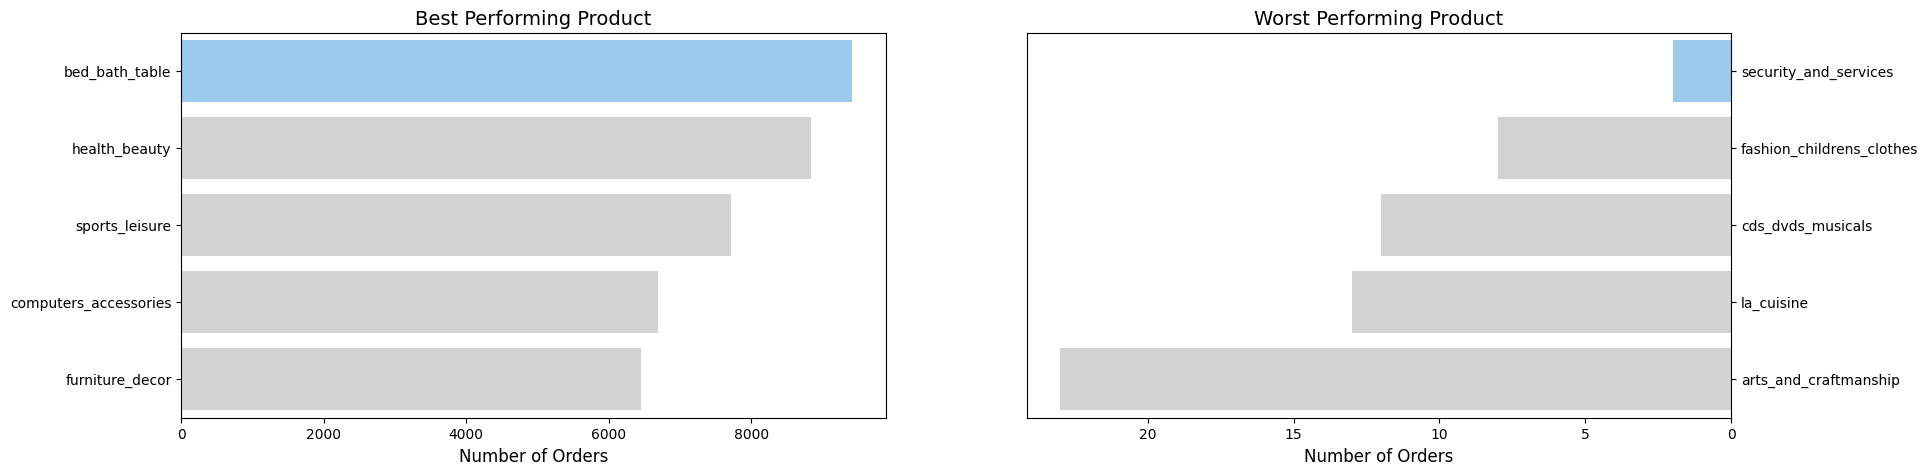

In [233]:
# # dataset-Product performance
order_product_df = pd.merge(order_items_dataset_df, orders_dataset_df, on="order_id", how="inner")
order_product_df = pd.merge(order_product_df, products_dataset_df, on="product_id", how="inner")
order_product_df = pd.merge(order_product_df, product_category_name_translation_df, on="product_category_name", how="left")

### Mendapatkan total order per kategori produk.
def create_sum_order_items_df(df):
    sum_order_items_df = (
        df.groupby("product_category_name_english")["order_id"]
        .nunique()
        .sort_values(ascending=False)
        .reset_index(name="total_orders")
    )
    return sum_order_items_df

### DataFrame untuk total order per kategori produk.
sum_order_items_df = create_sum_order_items_df(order_product_df)


# Display Performance
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), dpi=100)
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
# # Best Performing
sns.barplot(
    x="total_orders",
    y="product_category_name_english",
    data=sum_order_items_df.head(5),
    hue="product_category_name_english",
    palette=colors,
    ax=ax[0],
    legend=False
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Number of Orders", fontsize=12)
ax[0].set_title("Best Performing Product", loc="center", fontsize=14)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].tick_params(axis='x', labelsize=10)
# # Worst Performing
sns.barplot(
    x="total_orders",
    y="product_category_name_english",
    data=sum_order_items_df.sort_values(by="total_orders", ascending=True).head(5),
    hue="product_category_name_english",
    palette=colors,
    ax=ax[1],
    legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Number of Orders", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=14)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].tick_params(axis='x', labelsize=10)
plt.show()

#### Insight Analisis Performa Kategori Produk
- Kategori produk **"bed_bath_table"** menjadi kontributor terbesar dalam jumlah order, jauh melampaui kategori lainnya. Ini menandakan permintaan yang sangat tinggi dan perlu dipertahankan pada stok maupun promosi.
- Beberapa kategori seperti "security_and_services" dan "fashion_childrens_clothes" memiliki performa sangat rendah dengan sedikit order. Ini dapat disebabkan minimnya permintaan, kurang promosi, atau produk tidak relevan dengan kebutuhan mayoritas pelanggan.
- Data ini dapat digunakan sebagai dasar pengambilan keputusan bisnis untuk optimalisasi produk, strategi promosi, dan efisiensi manajemen inventory.

### Pertanyaan 2:

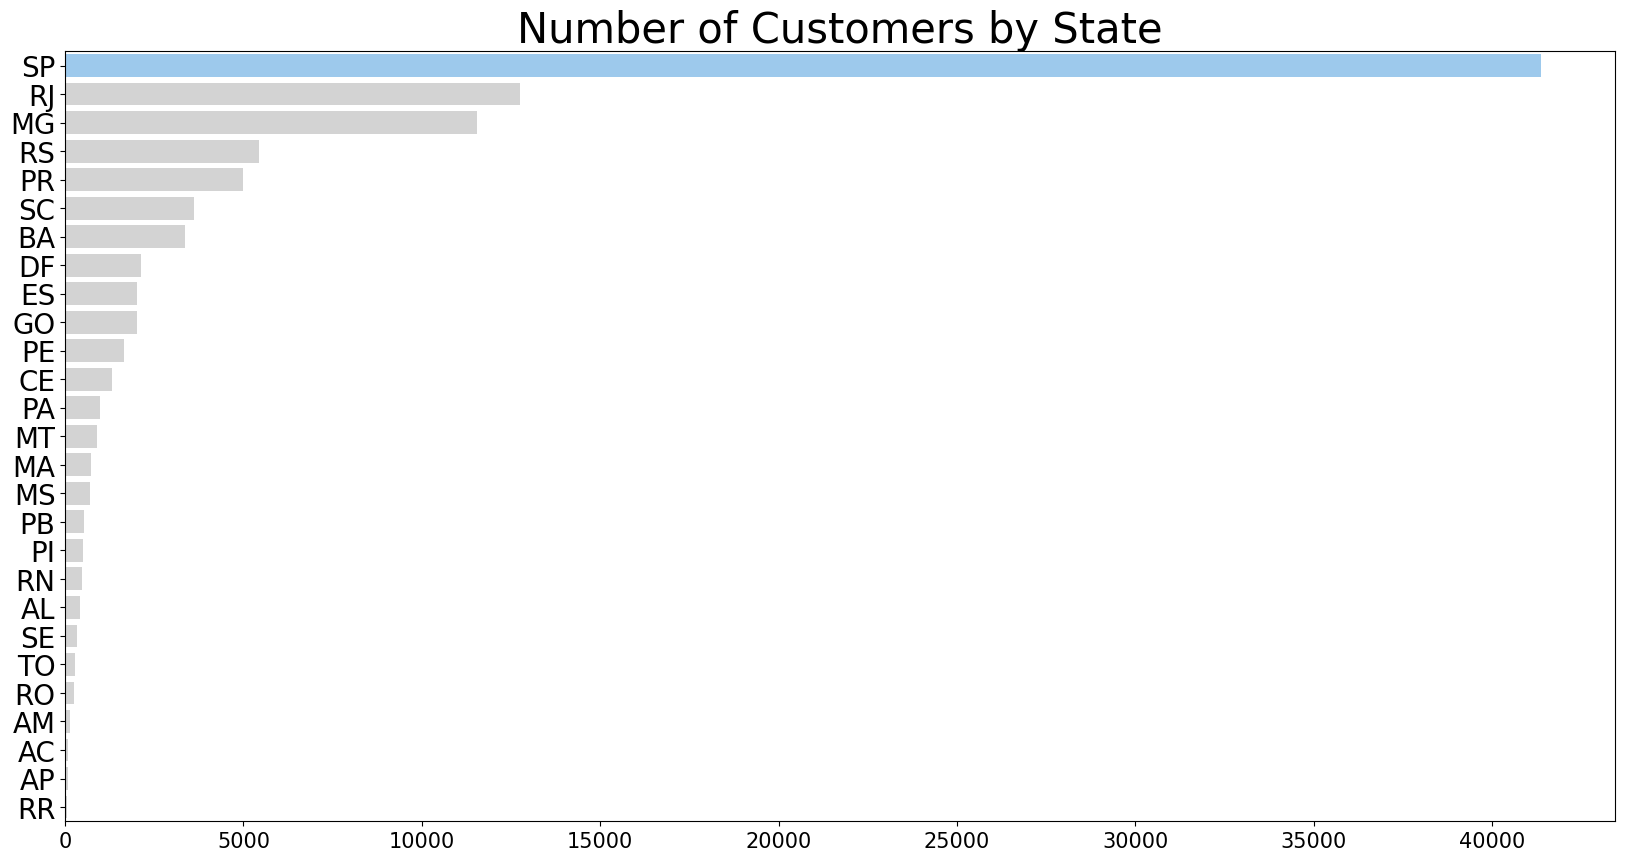

In [234]:
# # dataset-Order Harian
order_payments_df = pd.merge(orders_dataset_df, order_payments_dataset_df, on="order_id", how="inner")

# # dataset-Demography
order_customer_df = pd.merge(order_items_dataset_df, orders_dataset_df, on="order_id", how="inner")
order_customer_df = pd.merge(order_customer_df, customers_dataset_df, on="customer_id", how="inner")

### Mengetahui jumlah customer unik per state/daerah.
def create_bystate_df(df):
    bystate_df = df.groupby(by="customer_state").customer_id.nunique().reset_index()
    bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
    return bystate_df

### DataFrame untuk jumlah customer per state.
bystate_df = create_bystate_df(order_customer_df)

# Display Demography
# # Sort and create colors
sorted_df = bystate_df.sort_values(by="customer_count", ascending=False)
colors = ["#90CAF9" if i == 0 else "#D3D3D3" for i in range(len(sorted_df))]
# # Plotting
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    x="customer_count",
    y="customer_state",
    hue="customer_state",
    data=sorted_df,
    palette=colors,
    ax=ax
)
ax.set_title("Number of Customers by State", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
plt.show()


#### Insight Distribusi Customer per State
- State São Paulo (SP) merupakan kontributor terbesar dengan jumlah customer yang sangat mendominasi dibanding state lain. Selisih antara SP dengan urutan berikutnya (RJ, MG, RS, PR) sangat jauh, sehingga strategi pemasaran dan pengembangan produk sebaiknya difokuskan pada wilayah-wilayah ini.
- Sebagian besar state lainnya memiliki jumlah pelanggan yang kecil, yang menunjukkan peluang sekaligus tantangan untuk ekspansi pasar di wilayah tersebut.
- Distribusi pelanggan yang sangat timpang ini mencerminkan konsentrasi aktivitas e-commerce di area metropolitan besar.


## Analisa Tambahan

### Diplay Daily Order

Total Orders: 45101
Total Revenue: AUD7.249.746,73


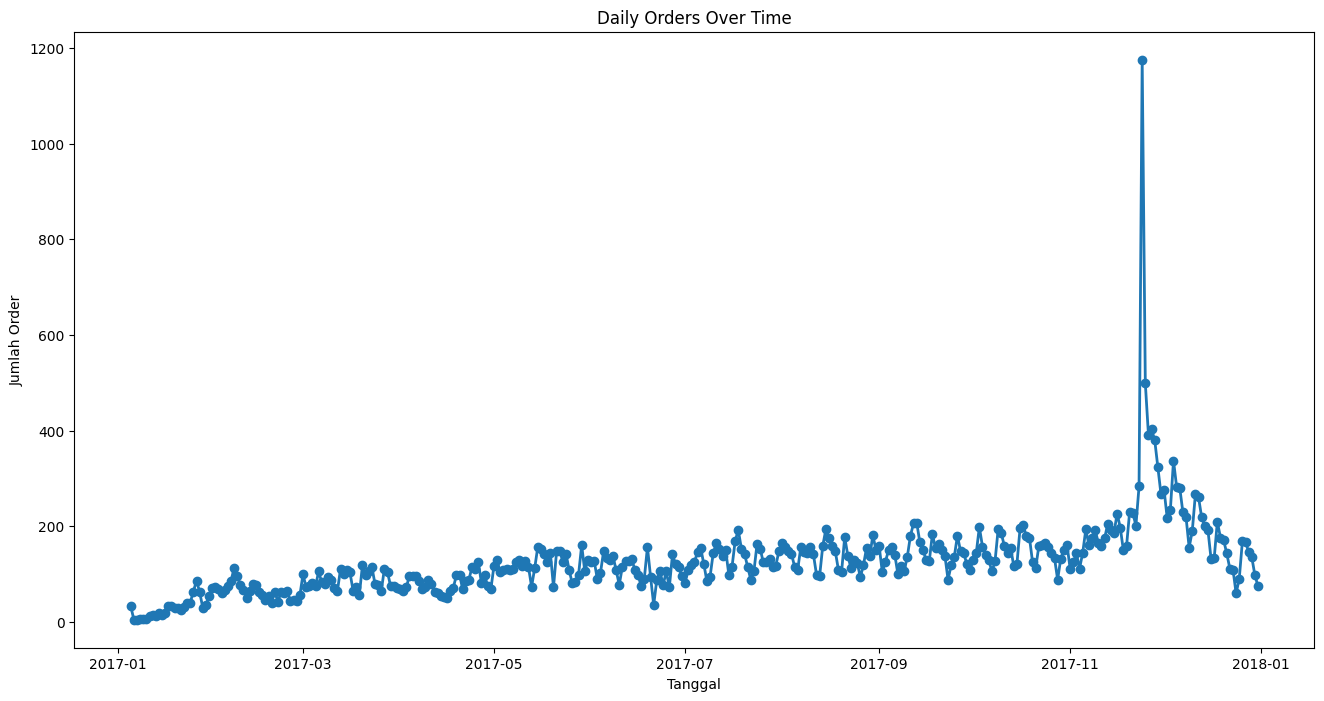

In [235]:
# Mengambil tanggal terawal (min()) dan terakhir (max()) dari kolom order_purchase_timestamp
# Akan digunakan sebagai batas awal dan akhir pada input tanggal.
min_date = orders_dataset_df["order_purchase_timestamp"].min()
max_date = orders_dataset_df["order_purchase_timestamp"].max()

start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-01-01')
# Memfilter baris dalam DataFrame hanya pada rentang tanggal yang dipilih user pada input tadi.
orders_dataset_df = orders_dataset_df[
    (orders_dataset_df["order_purchase_timestamp"] >= str(start_date)) &
    (orders_dataset_df["order_purchase_timestamp"] <= str(end_date))
    ]
# # dataset-Order Harian
order_payments_df = pd.merge(orders_dataset_df, order_payments_dataset_df, on="order_id", how="inner")
### Menghitung jumlah order dan total revenue (pendapatan) per hari.
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='D', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "total_price": "sum"
    }).reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "total_price": "revenue"
    }, inplace=True)
    return daily_orders_df

# Bikin kolom total_price dari payment_value
order_payments_df["total_price"] = order_payments_df["payment_value"]
# Panggil fungsi untuk dapatkan daily_orders_df
daily_orders_df = create_daily_orders_df(order_payments_df)

# Hitung total orders dan revenue
total_orders = daily_orders_df["order_count"].sum()
total_revenue = daily_orders_df["revenue"].sum()
formatted_revenue = format_currency(total_revenue, "AUD", locale='es_CO')

# Tampilkan metrik summary
print("Total Orders:", total_orders)
print("Total Revenue:", formatted_revenue)

# Visualisasi grafik
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_orders_df["order_purchase_timestamp"],  # X-axis
    daily_orders_df["order_count"],              # Y-axis
    marker='o',
    linewidth=2
)
ax.set_title("Daily Orders Over Time")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Order")
plt.show()

#### Insight Tren Order Harian
- Jumlah order harian mengalami pertumbuhan signifikan sejak awal 2017, mencerminkan adopsi e-commerce yang makin kuat.
- Terdapat lonjakan order yang sangat tajam di akhir 2017, kemungkinan besar akibat event promosi besar atau flash sale. Momen seperti ini terbukti efektif dalam meningkatkan penjualan.
- Setelah lonjakan, jumlah order harian tetap berada di level tinggi dan stabil, menunjukkan keberhasilan retensi pelanggan baru.
- Menjelang akhir periode data, terjadi penurunan order yang cukup drastis. Hal ini bisa disebabkan oleh selesainya periode pengumpulan data, efek musiman, atau tantangan bisnis yang perlu dievaluasi lebih lanjut.


### Display RFM

Average Recency (days): 138.2
Average Frequency: 1.0
Average Monetary: US$136,49


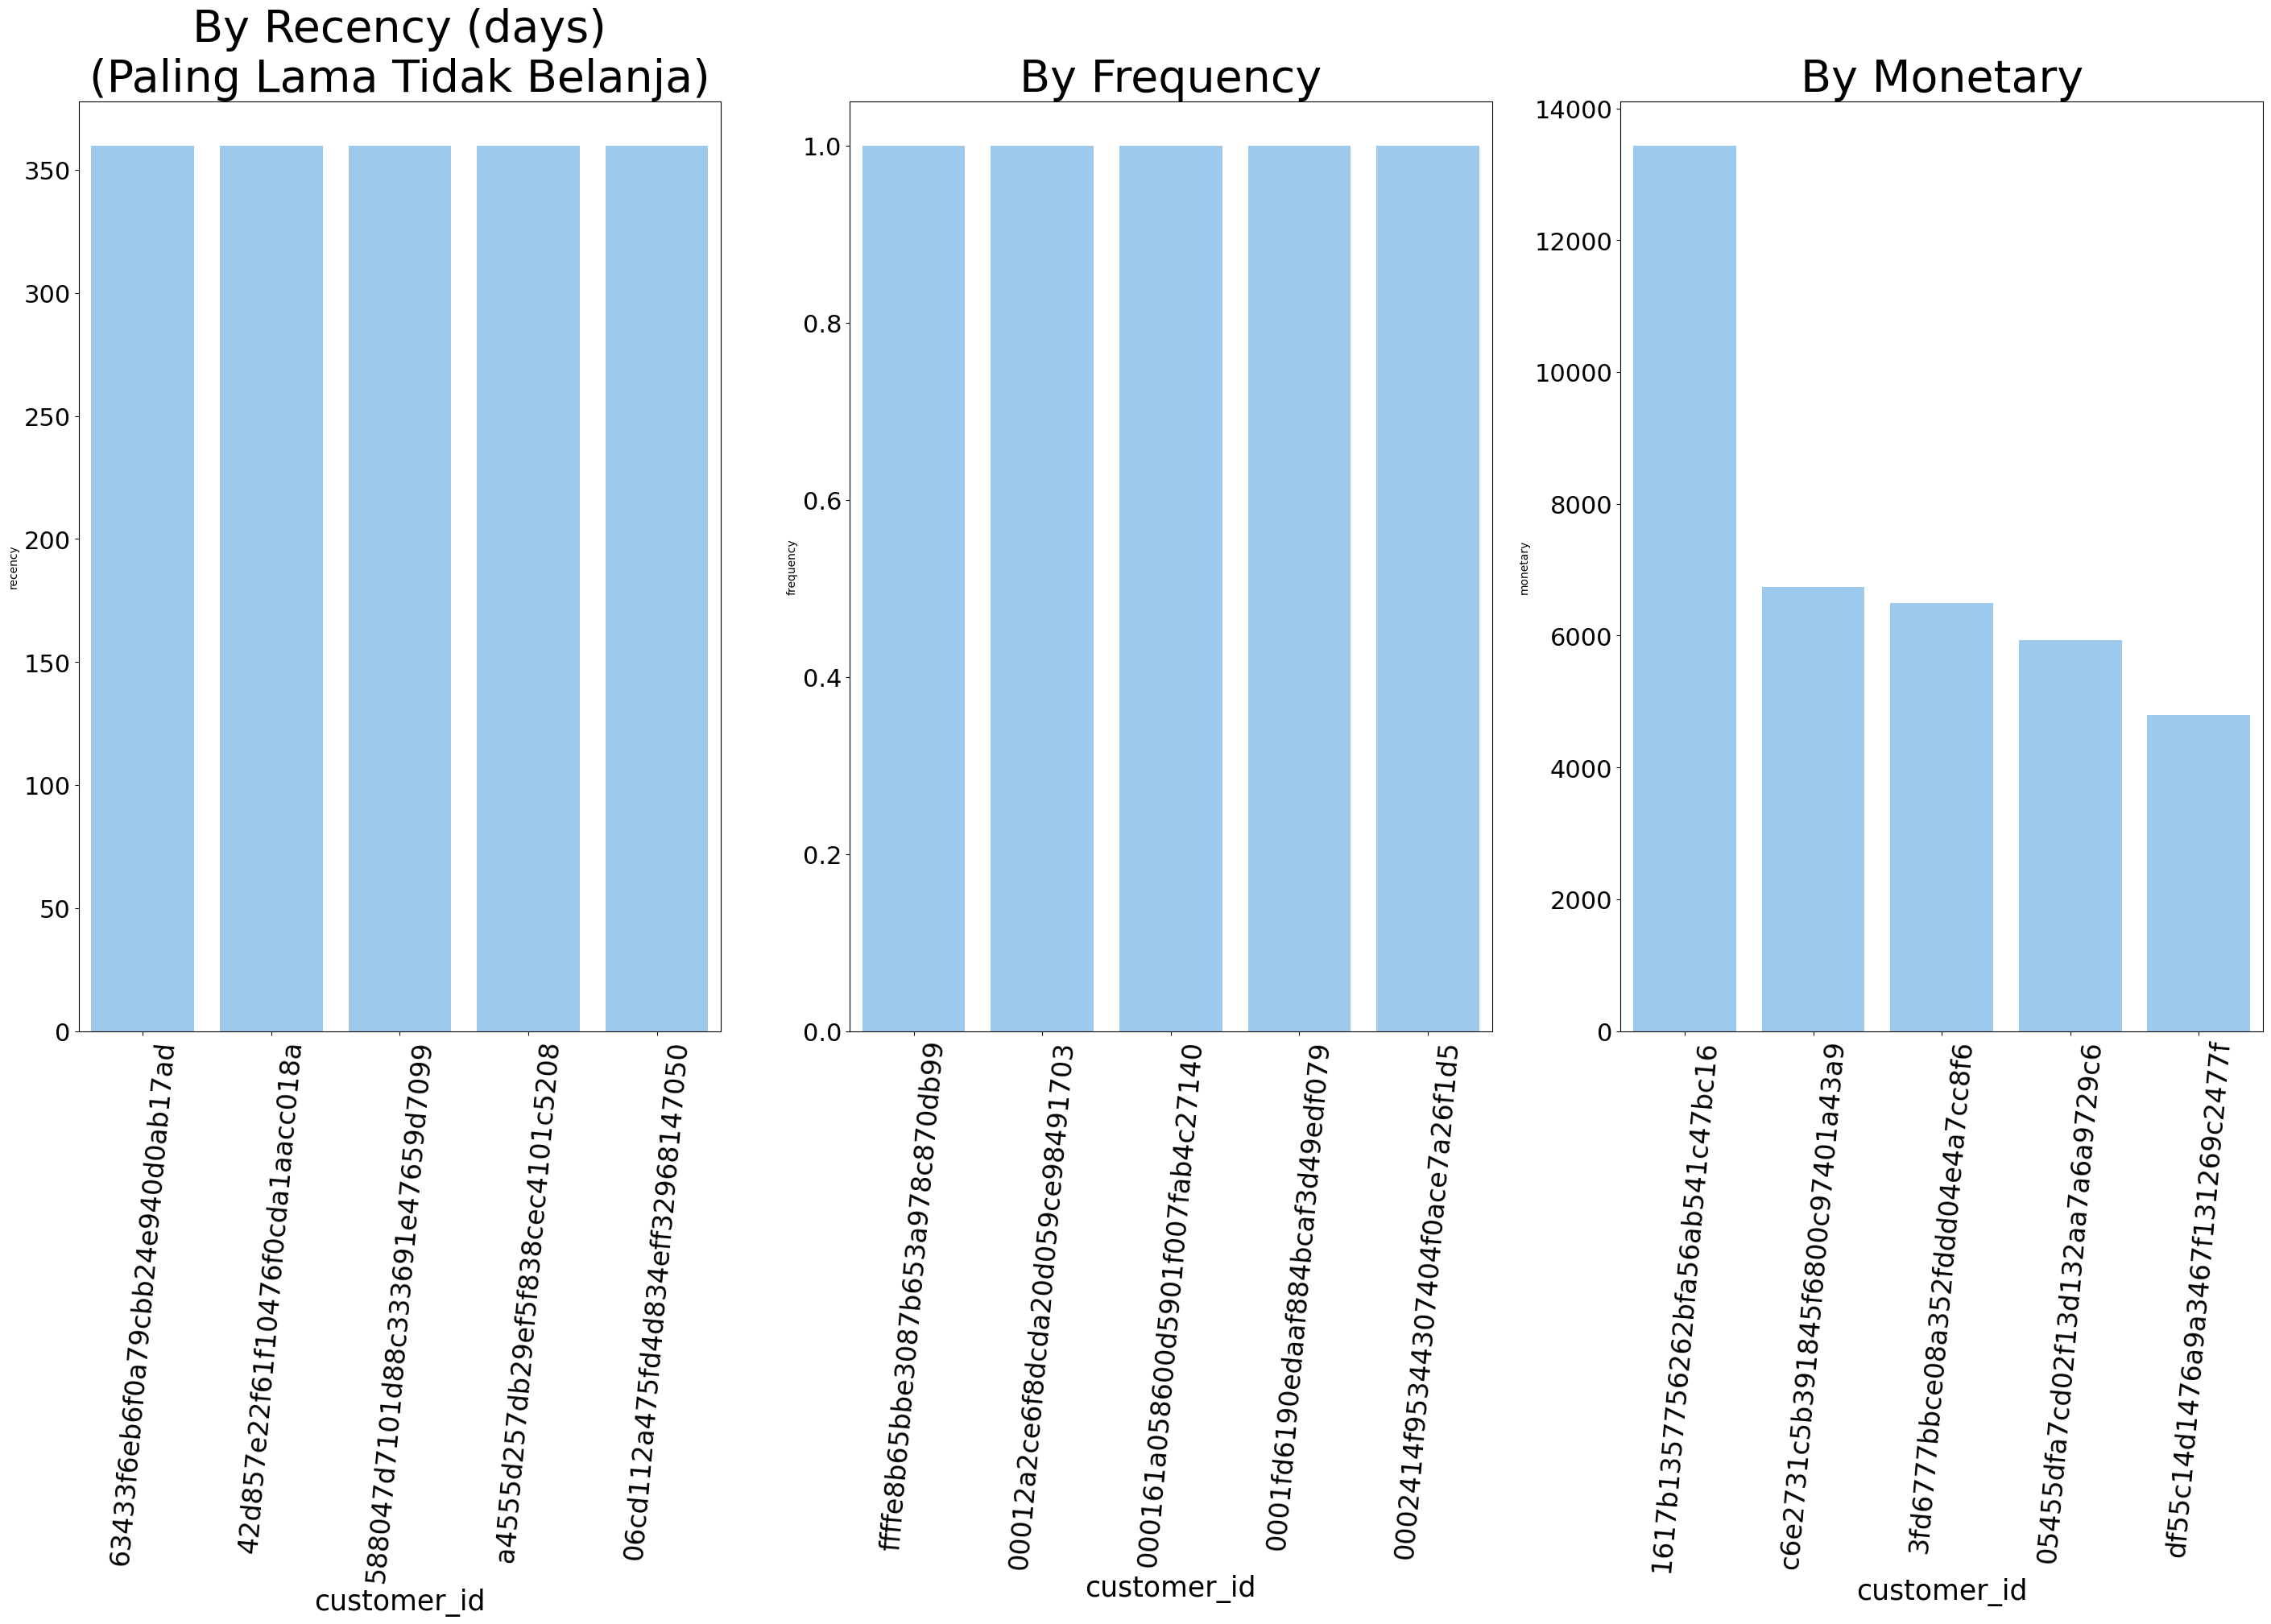

In [236]:
### Analisis RFM (Recency, Frequency, Monetary) per customer.

def create_rfm_df(df):
    df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
    recent_date = df["order_purchase_timestamp"].max().date()
    rfm_df = df.groupby("customer_id", as_index=False).agg({
        "order_purchase_timestamp": "max",
        "order_id": "nunique",
        "price": "sum"
    })
    rfm_df.columns = ["customer_id", "last_purchase_date", "frequency", "monetary"]
    rfm_df["last_purchase_date"] = rfm_df["last_purchase_date"].dt.date
    rfm_df["recency"] = rfm_df["last_purchase_date"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("last_purchase_date", axis=1, inplace=True)
    return rfm_df

# # dataset-RFM
customer_order_df = pd.merge(customers_dataset_df, orders_dataset_df, on="customer_id", how="inner")
customer_order_df = pd.merge(customer_order_df, order_items_dataset_df, on="order_id", how="left")

### DataFrame untuk analisis RFM per customer.
rfm_df = create_rfm_df(customer_order_df)

# Hitung rata-rata metrik RFM
avg_recency = round(rfm_df.recency.mean(), 1)
avg_frequency = round(rfm_df.frequency.mean(), 2)
avg_monetary = format_currency(rfm_df.monetary.mean(), "USD", locale='id_ID')

# Tampilkan hasil (bisa pakai print, atau tabel dataframe)
print("Average Recency (days):", avg_recency)
print("Average Frequency:", avg_frequency)
print("Average Monetary:", avg_monetary)

# --- Visualisasi Top Customers by RFM ---
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
colors = ["#90CAF9"] * 5

# Top 5 customer dengan recency TERBESAR (paling lama tidak belanja)
top_recency = rfm_df.sort_values(by="recency", ascending=False).head(5)
sns.barplot(
    y="recency",
    x="customer_id",
    hue="customer_id",
    data=top_recency,
    palette=colors,
    ax=ax[0],
    legend=False
)
ax[0].set_title("By Recency (days)\n(Paling Lama Tidak Belanja)", loc="center", fontsize=40)
ax[0].set_xlabel("customer_id", fontsize=25)
ax[0].tick_params(axis='x', labelsize=24, labelrotation=85)
ax[0].tick_params(axis='y', labelsize=22)

# Top 5 customer dengan frequency TERBESAR
top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
sns.barplot(
    y="frequency",
    x="customer_id",
    hue="customer_id",
    data=top_frequency,
    palette=colors,
    ax=ax[1],
    legend=False
)
ax[1].set_title("By Frequency", loc="center", fontsize=40)
ax[1].set_xlabel("customer_id", fontsize=25)
ax[1].tick_params(axis='x', labelsize=24, labelrotation=85)
ax[1].tick_params(axis='y', labelsize=22)

# Top 5 customer dengan monetary TERBESAR
top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)
sns.barplot(
    y="monetary",
    x="customer_id",
    hue="customer_id",
    data=top_monetary,
    palette=colors,
    ax=ax[2],
    legend=False
)
ax[2].set_title("By Monetary", loc="center", fontsize=40)
ax[2].set_xlabel("customer_id", fontsize=25)
ax[2].tick_params(axis='x', labelsize=24, labelrotation=85)
ax[2].tick_params(axis='y', labelsize=22)

plt.show()

#### Insight Analisis RFM
- **Recency:** Top 5 pelanggan dengan recency terbesar adalah pelanggan yang sudah sangat lama tidak melakukan pembelian. Pelanggan seperti ini berisiko churn dan perlu di-reaktivasi dengan penawaran khusus atau follow-up personal.
- **Frequency:** Sebagian besar pelanggan adalah pembeli satu kali (one-time buyer). Ini menunjukkan perlunya strategi loyalty untuk mendorong pembelian berulang.
- **Monetary:** Pelanggan dengan total pembelian terbesar (VIP customer) memberikan kontribusi signifikan terhadap pendapatan. Pelanggan ini sebaiknya dipertahankan dengan benefit eksklusif dan pendekatan lebih personal.


## Conclusion

### Ringkasan Insight Bisnis

- Bisnis mengalami pertumbuhan pesanan yang stabil, dengan beberapa puncak musiman yang bisa dimanfaatkan untuk promosi atau kampanye.
- Produk kategori [nama produk] dan area [nama state/kota] sangat potensial untuk difokuskan pada periode high season.
- Data pelanggan loyal yang teridentifikasi bisa dijadikan sasaran utama untuk program loyalitas atau penawaran khusus.
- Sebagian data yang hilang (missing) berasal dari order yang memang tidak melalui proses tertentu (misal belum disetujui/canceled), sehingga bisa diabaikan pada beberapa analisis.

## Saran Strategis ke Stakeholder
1. Fokus pada Produk Top Performer
* Yang terlihat: Produk-produk tertentu punya volume order jauh lebih tinggi dari yang lain.
* Saran: Tingkatkan stok dan kampanye pemasaran untuk produk-produk top performer. Pertimbangkan bundling produk dengan item kurang laku agar perputaran inventaris merata.
---
2. Evaluasi Produk dengan Penjualan Rendah
* Yang terlihat: Ada produk yang hampir tidak pernah dipesan.
* Saran: Lakukan evaluasi menyeluruh — apakah masalahnya di harga, kualitas, atau awareness. Bila perlu, pertimbangkan untuk diskontinu produk tersebut atau lakukan promosi clearance.
---
3. Perkuat Distribusi di Area dengan Potensi Tinggi
* Yang terlihat: Customer terbanyak datang dari beberapa provinsi atau kota tertentu.
* Saran: Fokus distribusi, logistik, dan promo ke wilayah tersebut. Pertimbangkan kerjasama dengan ekspedisi lokal atau bahkan buka warehouse mikro.
---
4. Retargeting Berdasarkan RFM
* Yang terlihat: Ada pelanggan dengan nilai pembelian tinggi, sering belanja, dan baru-baru ini aktif.
* Saran:
    * Berikan loyalty reward untuk pelanggan terbaik.
    * Buat segmentasi email marketing berdasarkan RFM.
    * Bangun strategi untuk menarik kembali pelanggan dengan recency tinggi tapi frequency menurun.
